## Imports

In [347]:
import pandas as pd
import sys

sys.path.insert(0,'../')

from postprocess import *

## Interaction data processing

In [348]:
# For SATORI based interactions
#df = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.08.txt',sep='\t')

# For FIS based interactions
df = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [349]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [350]:
df.shape

(2542, 12)

### Load the motif description file to annotate the interactions. 
Here we use CISBP (U toronto) motif description file. 

In [351]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [352]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


### Annotate the interacting motifs

In [353]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)

In [354]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
3,filter0<-->filter14,13,M1592_1.02,0.000295,M0891_1.02,0.023475,8.0,125.0,108.0,242.0,4.704793e-03,1.244853e-02,SOX3,TLX2
7,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,486.0,389.0,118.0,183.0,1.449603e-08,2.624850e-07,SOX3,TLX2
8,filter0<-->filter23,22,M1592_1.02,0.000295,M0891_1.02,0.009776,128.0,407.0,167.0,221.0,1.855752e-07,2.319038e-06,SOX3,TLX2
9,filter0<-->filter24,23,M1592_1.02,0.000295,M0891_1.02,0.006014,10.0,167.0,79.0,219.0,9.156376e-03,2.167899e-02,SOX3,TLX2
10,filter0<-->filter28,27,M1592_1.02,0.000295,M0609_1.02,0.001205,308.0,423.0,150.0,129.0,3.249813e-09,7.151267e-08,SOX3,DNMT1


In [355]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [356]:
df = df[df['TF1']!=df['TF2']]

In [357]:
df.shape

(2252, 15)

In [358]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [359]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [360]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter0<-->filter14,13,M1592_1.02,0.000295,M0891_1.02,0.023475,8.0,125.0,108.0,242.0,4.704793e-03,1.244853e-02,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2
1,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,486.0,389.0,118.0,183.0,1.449603e-08,2.624850e-07,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2
2,filter0<-->filter23,22,M1592_1.02,0.000295,M0891_1.02,0.009776,128.0,407.0,167.0,221.0,1.855752e-07,2.319038e-06,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2
3,filter0<-->filter24,23,M1592_1.02,0.000295,M0891_1.02,0.006014,10.0,167.0,79.0,219.0,9.156376e-03,2.167899e-02,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2
4,filter0<-->filter28,27,M1592_1.02,0.000295,M0609_1.02,0.001205,308.0,423.0,150.0,129.0,3.249813e-09,7.151267e-08,SOX3,DNMT1,SOX3$\longleftrightarrow$DNMT1


In [361]:
df.shape

(2252, 15)

## Most Frequent TF Family Interactions

In [362]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [363]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [364]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [365]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter0<-->filter14,13,M1592_1.02,0.000295,M0891_1.02,0.023475,8.0,125.0,108.0,242.0,4.704793e-03,1.244853e-02,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
1,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,486.0,389.0,118.0,183.0,1.449603e-08,2.624850e-07,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
2,filter0<-->filter23,22,M1592_1.02,0.000295,M0891_1.02,0.009776,128.0,407.0,167.0,221.0,1.855752e-07,2.319038e-06,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
3,filter0<-->filter24,23,M1592_1.02,0.000295,M0891_1.02,0.006014,10.0,167.0,79.0,219.0,9.156376e-03,2.167899e-02,SOX3,TLX2,SOX3$\longleftrightarrow$TLX2,Sox,Homeodomain,Sox$\longleftrightarrow$Homeodomain
4,filter0<-->filter28,27,M1592_1.02,0.000295,M0609_1.02,0.001205,308.0,423.0,150.0,129.0,3.249813e-09,7.151267e-08,SOX3,DNMT1,SOX3$\longleftrightarrow$DNMT1,Sox,CxxC,Sox$\longleftrightarrow$CxxC


### Distribution of individual TF or TF family interactions

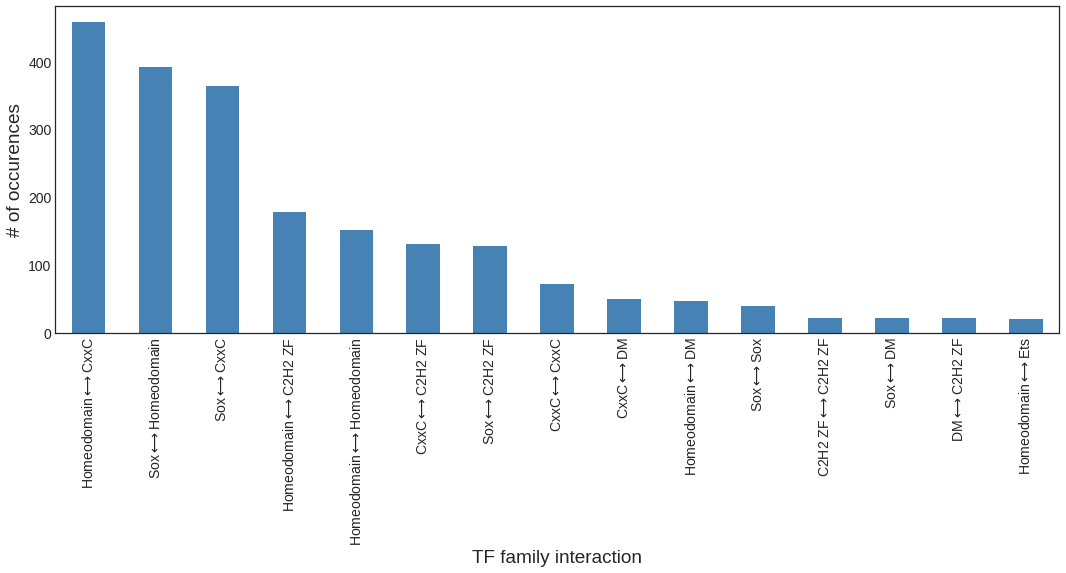

In [366]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

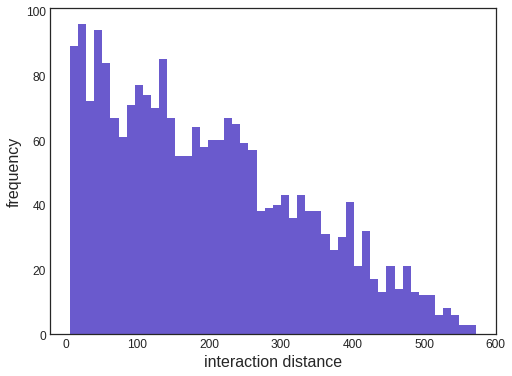

In [367]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [368]:
df['mean_distance'].mean(), df['mean_distance'].median()

(196.97335701598578, 179.0)

### Most frequent interactions and their respective interaction distances

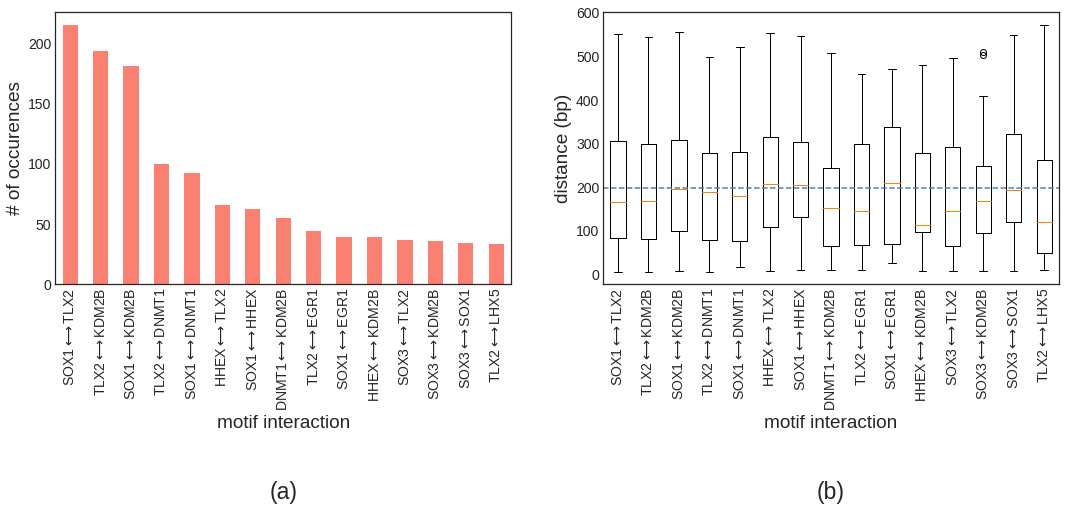

In [369]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_mean_dist=True)

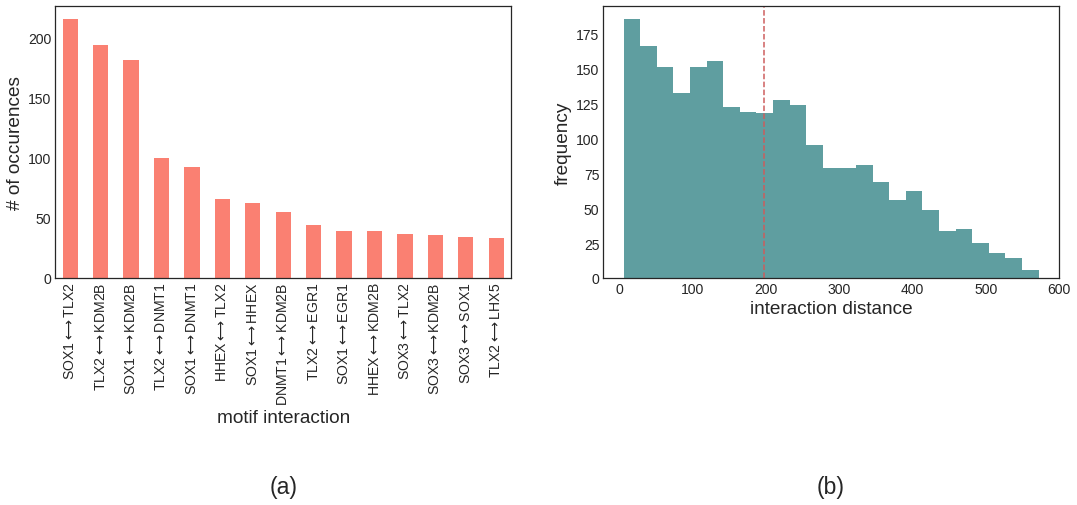

In [370]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_mean_dist=True)

### Annotate Interactions using TRRUSTv2 (and other sources)

#### Read TRRUSTv2 interactions

In [371]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [372]:
df['Interaction_in_TRUSTv2'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [373]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1]

In [374]:
df_resTRUSTv2[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
1049,DNMT1$\longleftrightarrow$EGR1,C2H2 ZF,CxxC,1.533504e-12
1059,EGR1$\longleftrightarrow$LCOR,C2H2 ZF,Pipsqueak,4.025276e-07
465,DNMT1$\longleftrightarrow$LCOR,CxxC,Pipsqueak,7.933190e-07
1237,EGR1$\longleftrightarrow$FOXK2,Forkhead,C2H2 ZF,2.336071e-02


### Annotate Interactions using HIPPIE database

#### Read hippie interactions

In [375]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/Protein-interactions/hippie/interactions_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [376]:
for key,value in human_dict.items():
    human_dict[key] = np.array([[val, '', '0'] for val in value])

In [377]:
df['Interaction_in_HIPPIE'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [378]:
df_resHIPPIE = df[df['Interaction_in_HIPPIE']==1]

In [379]:
df_resHIPPIE[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
1287,HHEX$\longleftrightarrow$KDM2B,CxxC,Homeodomain,1.463055e-16
1505,HHEX$\longleftrightarrow$TLX2,Homeodomain,Homeodomain,1.677151e-14
433,DNMT1$\longleftrightarrow$KDM2B,CxxC,CxxC,7.097988e-14
465,DNMT1$\longleftrightarrow$LCOR,CxxC,Pipsqueak,7.933190e-07
1007,SOX3$\longleftrightarrow$EGR1,Sox,C2H2 ZF,1.072302e-06
1312,KDM2B$\longleftrightarrow$LCOR,CxxC,Pipsqueak,2.053366e-06
222,FOXK2$\longleftrightarrow$DNMT1,Forkhead,CxxC,3.151550e-03
224,FOXK2$\longleftrightarrow$KDM2B,Forkhead,CxxC,2.519028e-02
1676,ZNF32$\longleftrightarrow$HHEX,C2H2 ZF,Homeodomain,3.686452e-02
